# Import Data

In [1]:
# library imports
import csv
import nltk
import pandas as pd
import numpy as np

In [2]:
# import NDP file (~3GB of plain text)
ndp_file = "/Users/jessicawilliams/ipsw-files/227-www-ndp-ca.txt"

In [3]:
# load the NDP plain text as a dataframe
df = pd.read_csv(ndp_file, sep = ",", usecols=[0,1,2,3], header=None, error_bad_lines=False, quoting=csv.QUOTE_NONE)
df = df.sort_values(0)

In [4]:
# find a homepage to focus on for the diffs
homepages = df.loc[df[2] == "http://www.ndp.ca/"]

In [5]:
# how many homepages are there?
len(homepages);

In [6]:
# let's look at one record
# should be the first crawl in the collection
homepages.iloc[0].tolist();

# Screenshot homepages

In [7]:
wayback_links = []
for x in range(0,len(homepages)):
    wayback_links.append("https://wayback.archive-it.org/227/" + homepages.iloc[x].tolist()[0][1:] + "/" + homepages.iloc[x].tolist()[1])

In [8]:
# from selenium import webdriver

# DRIVER = 'chromedriver'
# driver = webdriver.Chrome(DRIVER)

# count=1
# for page in wayback_links:
    # driver.get(page);
    # export_file="homepage-images/"+str(count)+"-ndp.png"
    # count=count+1
    # screenshot = driver.save_screenshot(export_file)
    
# driver.quit()

# Image Analysis Functions

In [9]:
# import the necessary packages
from skimage import measure # pip3 install scikit-image
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [10]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

def compare_images(imageA, imageB, title):
	# compute the mean squared error and structural similarity
	# index for the images
	m = mse(imageA, imageB)
	s = measure.compare_ssim(imageA, imageB)

	# setup the figure
	fig = plt.figure(title)
	plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))

	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")

	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")

	# show the images
	plt.show()

# Compare homepages between time-steps

In [11]:
# load the images

# import glob
# images = glob.glob("/Users/jessicawilliams/ipsw-quantifying-change/homepage-images/*-ndp.png")

s = []
images = []
for x in range(0,len(wayback_links)-1):
    a = x+1
    b = x+2
    A = "/Users/jessicawilliams/ipsw-quantifying-change/homepage-images/%i-ndp.png" % a
    B = "/Users/jessicawilliams/ipsw-quantifying-change/homepage-images/%i-ndp.png" % b
    old = cv2.imread(A)
    images.append(A)
    new = cv2.imread(B)
    # convert the images to grayscale
    old = cv2.cvtColor(old, cv2.COLOR_BGR2GRAY)
    new = cv2.cvtColor(new, cv2.COLOR_BGR2GRAY)
    # compare the images
    # compare_images(old, new, "Old vs. New")
    s.append(1-measure.compare_ssim(old, new))
    
images.append(B)

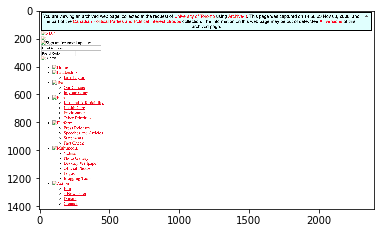

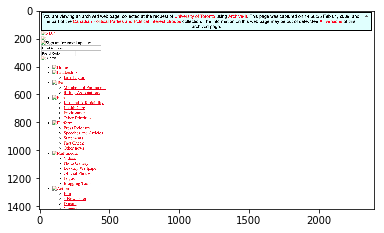

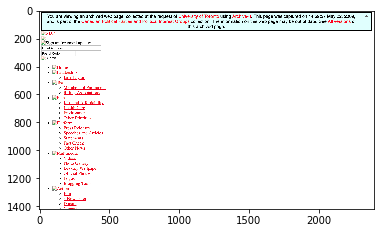

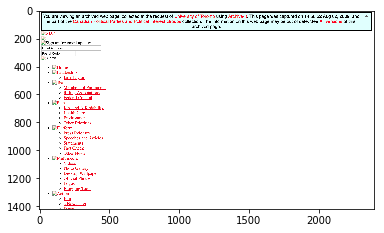

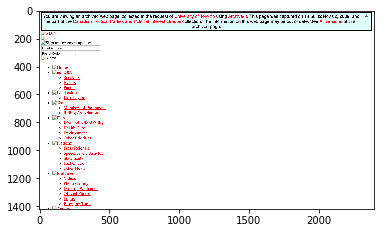

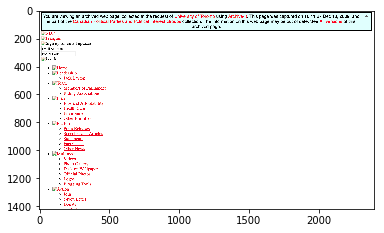

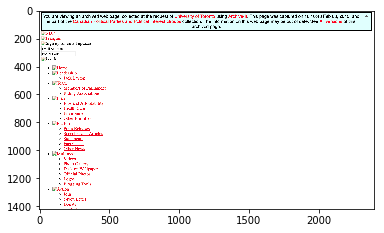

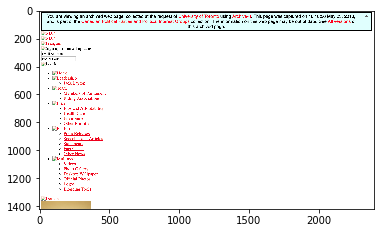

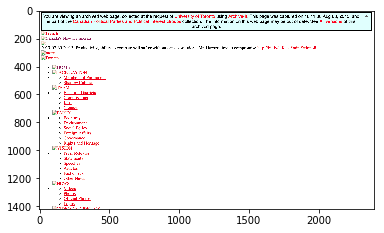

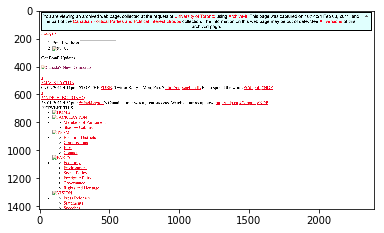

In [29]:
fails = [40,41,42,43,44,45,46,47,48,50]

for x in range(0,len(fails)):
    s[fails[x]]=-10
    s[fails[x]-1]=-10
    fig = plt.figure()
    imgA = cv2.imread(images[fails[x]])
    plt.imshow(imgA, cmap = plt.cm.gray)
    

# fig = plt.figure()
# fig.add_subplot(1, 2, 1)
# plt.imshow(old, cmap = plt.cm.gray)
# fig.add_subplot(1,2,2)
# plt.imshow(new, cmap = plt.cm.gray)

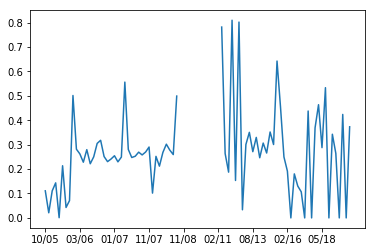

In [21]:
# Find the different crawl dates
times = homepages[0].unique()
N = 10
s_plot = s
for i in range(0,len(s)):
    if s[i] == -10:
        s_plot[i] = np.nan

my_xticks = []
for i in range (0,len(times)-1,N):
    my_xticks.append(str(times[i][5:7] + "/" + times[i][3:5]));
plt.plot(s_plot);
plt.xticks(range(0,len(times)-1,N), my_xticks);

In [31]:
s_in_order = s[:] # make a copy
s_in_order.sort(reverse=True)

In [33]:
neg_s = [-x for x in s]
indices=np.argsort(neg_s)

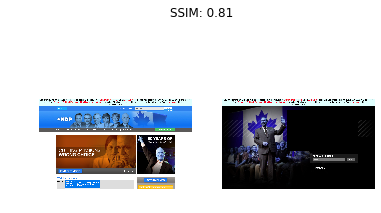

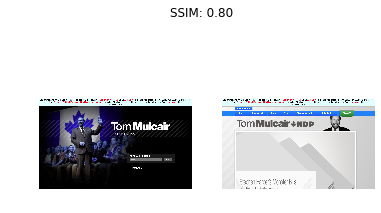

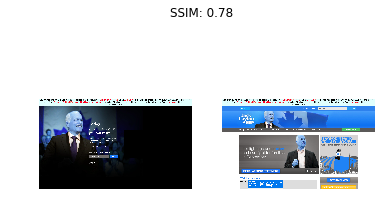

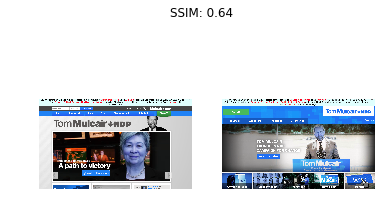

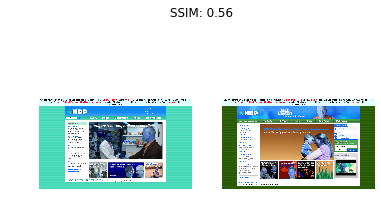

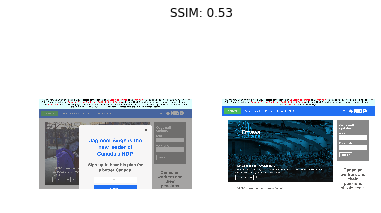

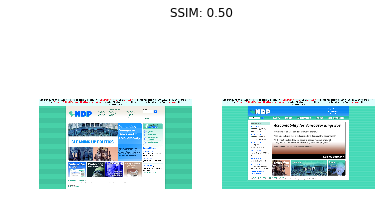

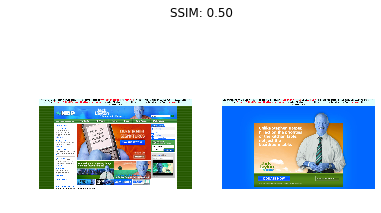

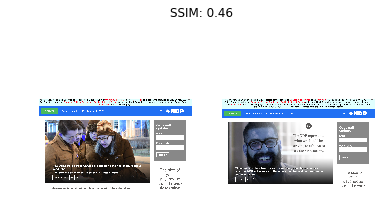

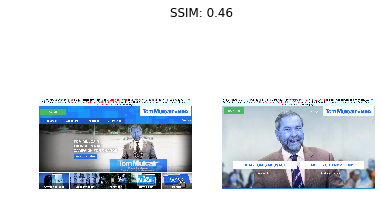

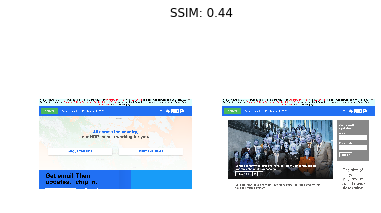

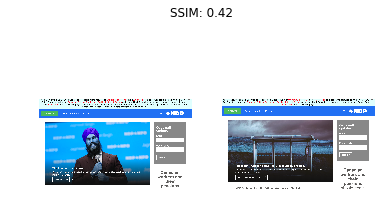

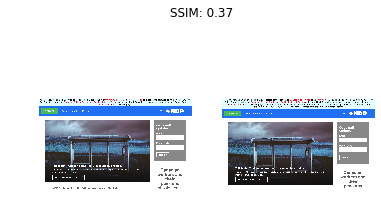

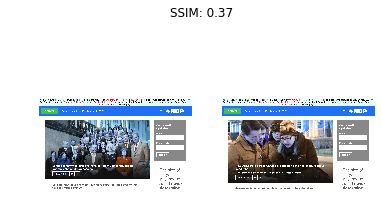

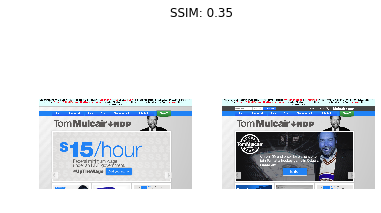

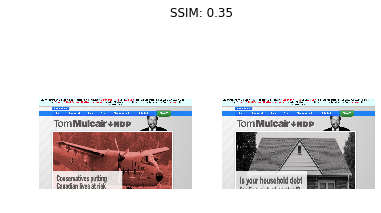

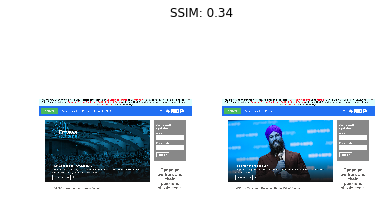

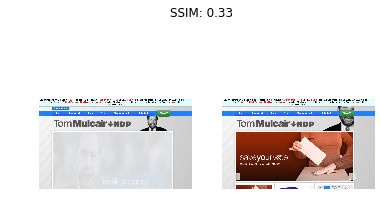

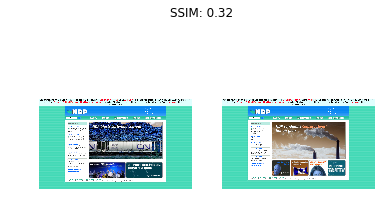

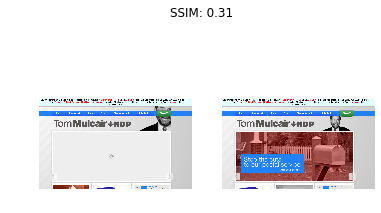

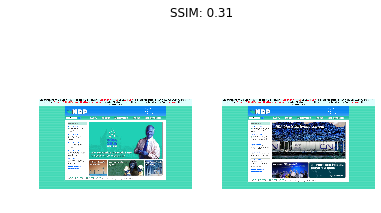

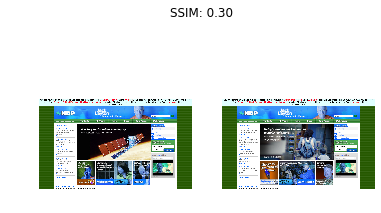

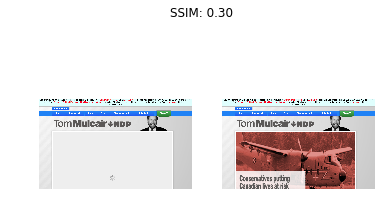

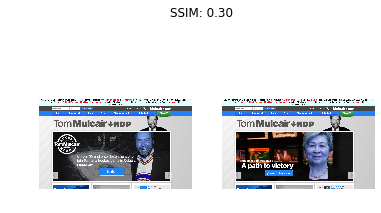

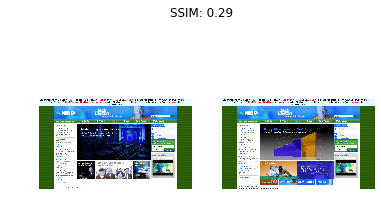

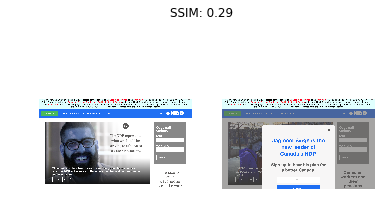

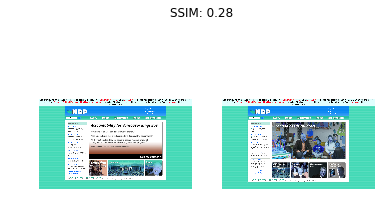

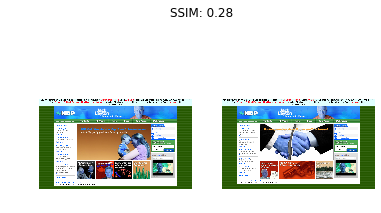

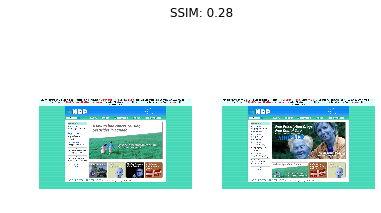

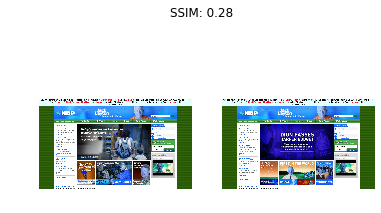

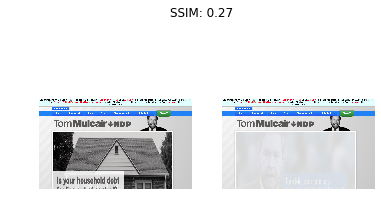

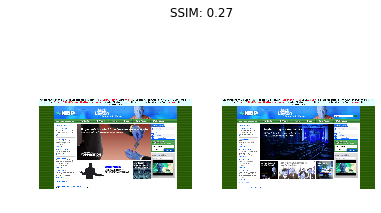

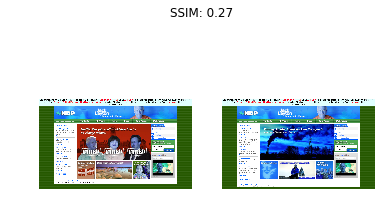

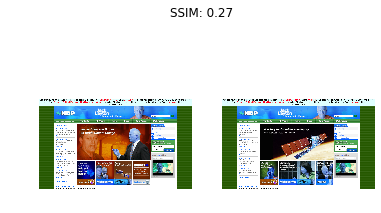

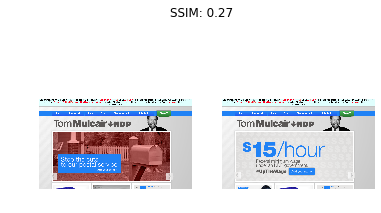

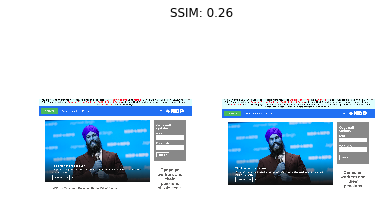

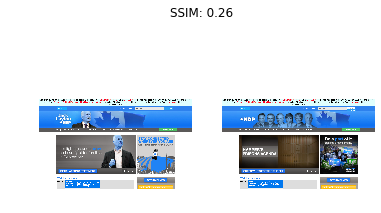

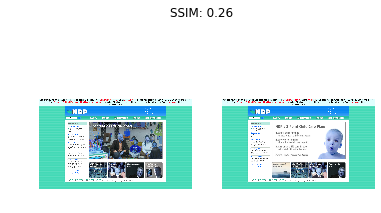

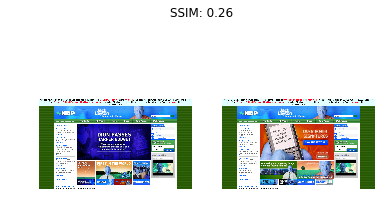

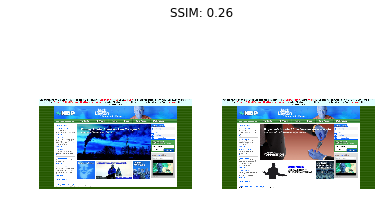

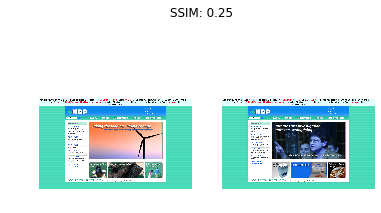

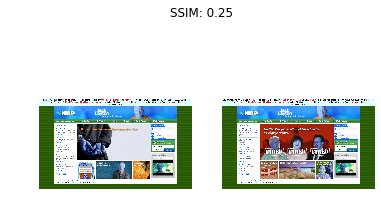

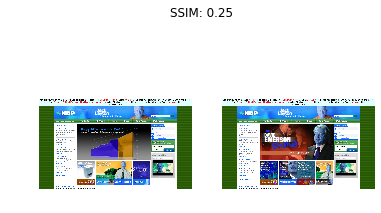

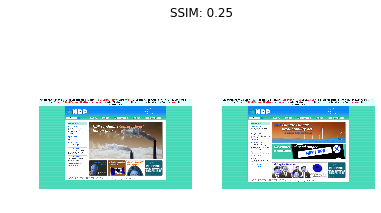

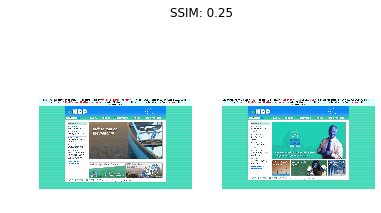

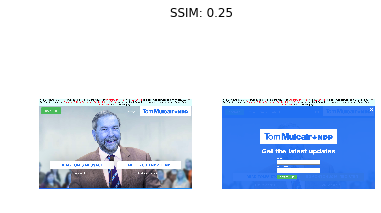

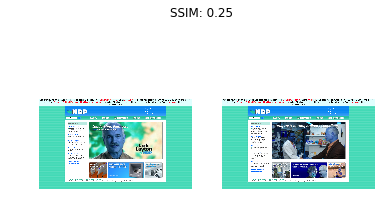

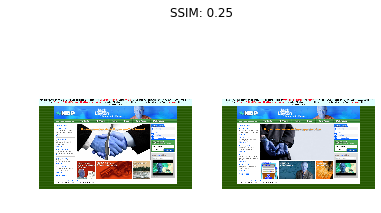

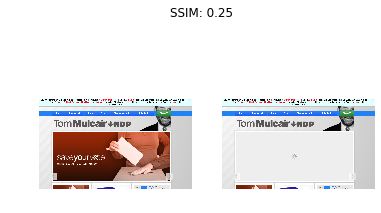

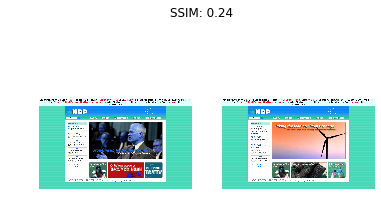

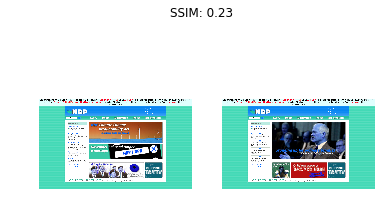

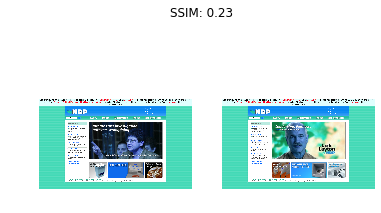

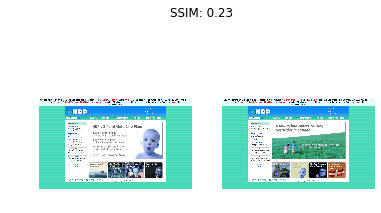

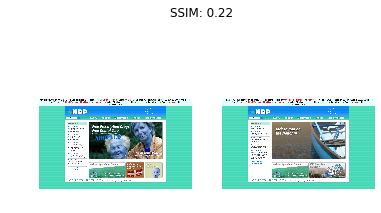

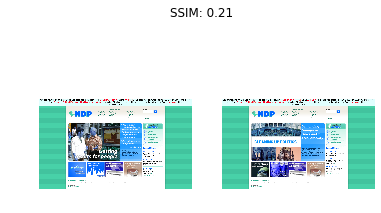

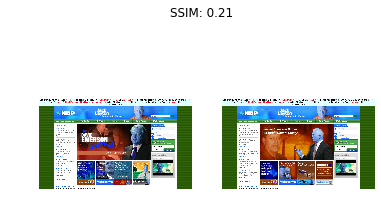

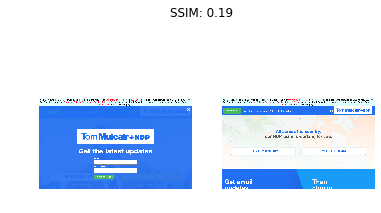

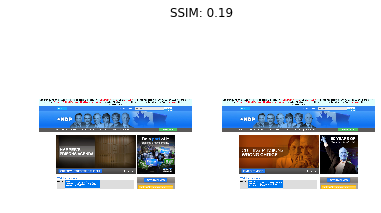

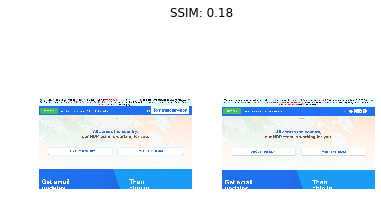

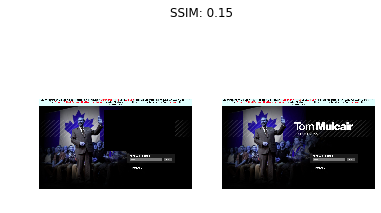

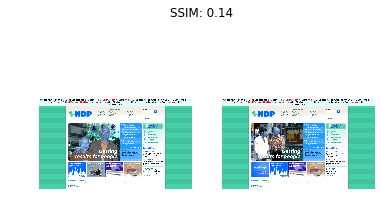

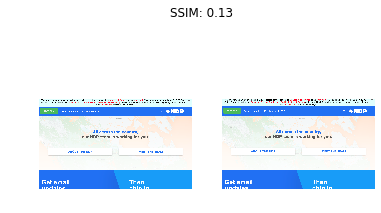

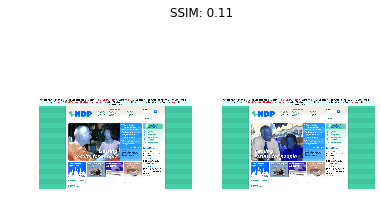

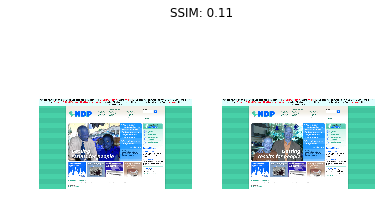

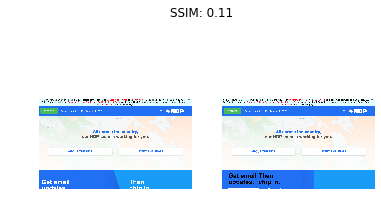

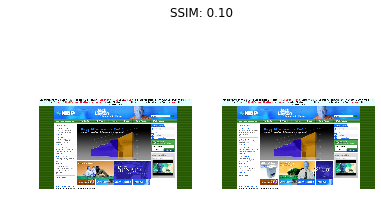

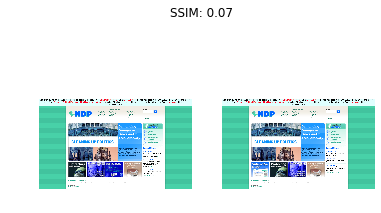

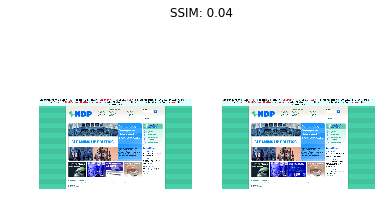

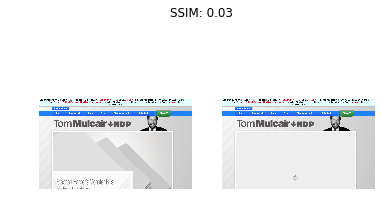

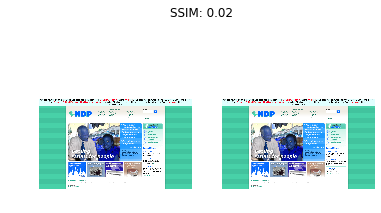

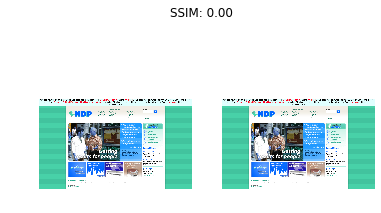

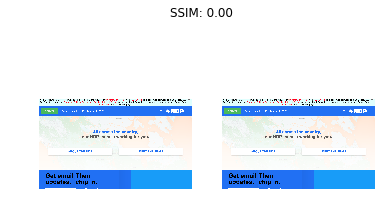

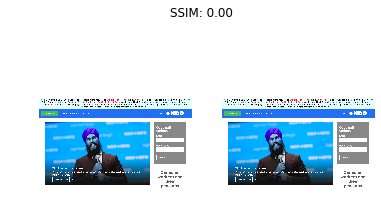

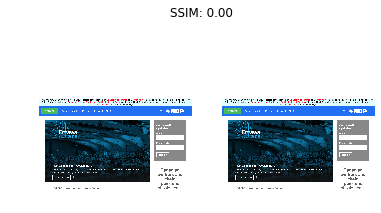

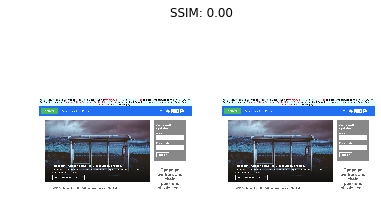

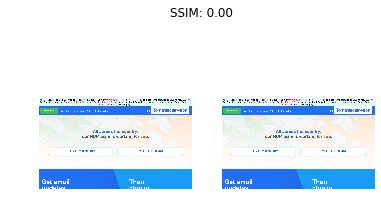

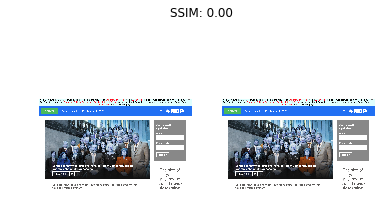

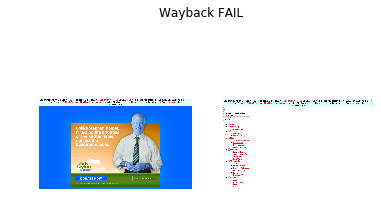

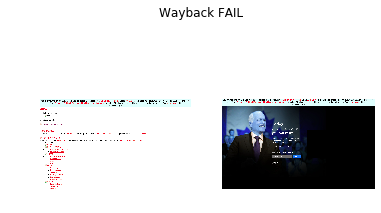

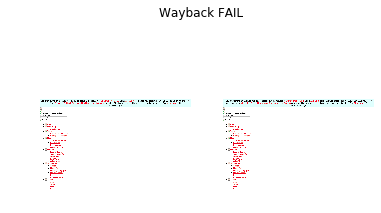

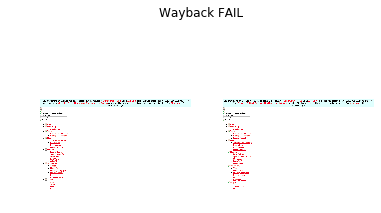

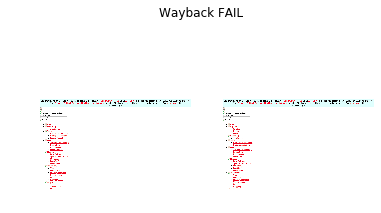

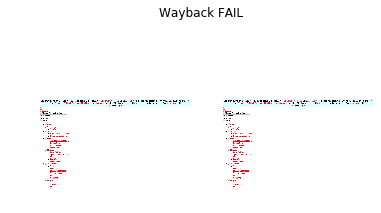

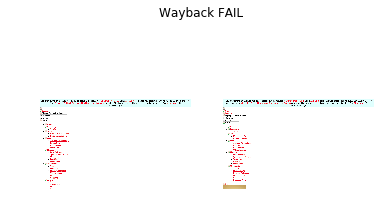

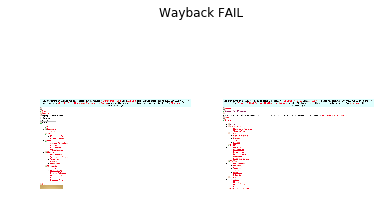

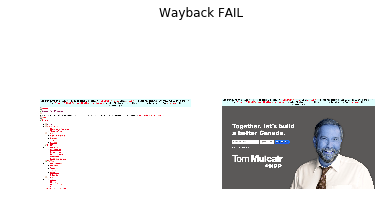

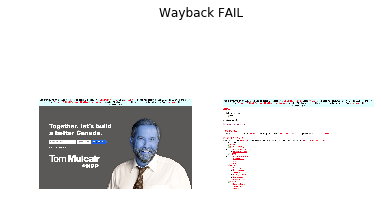

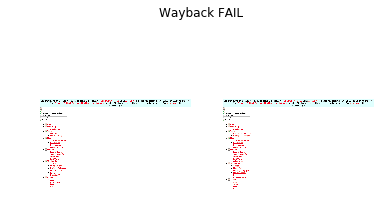

In [36]:
for x in range(0,len(indices)-1):
    fig = plt.figure()
    plt.suptitle("SSIM: %.2f" % s_in_order[x])
    if s_in_order[x]==-10:
        plt.suptitle("Wayback FAIL")
    imgA = cv2.imread(images[indices[x]])
    imgB = cv2.imread(images[indices[x]+1])

    # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imgA, cmap = plt.cm.gray)
    plt.axis("off")

    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imgB, cmap = plt.cm.gray)
    plt.axis("off")

    # show the images
    plt.show()